**Task 1 One-vs-rest classifier**

## Task 1.1 (a)

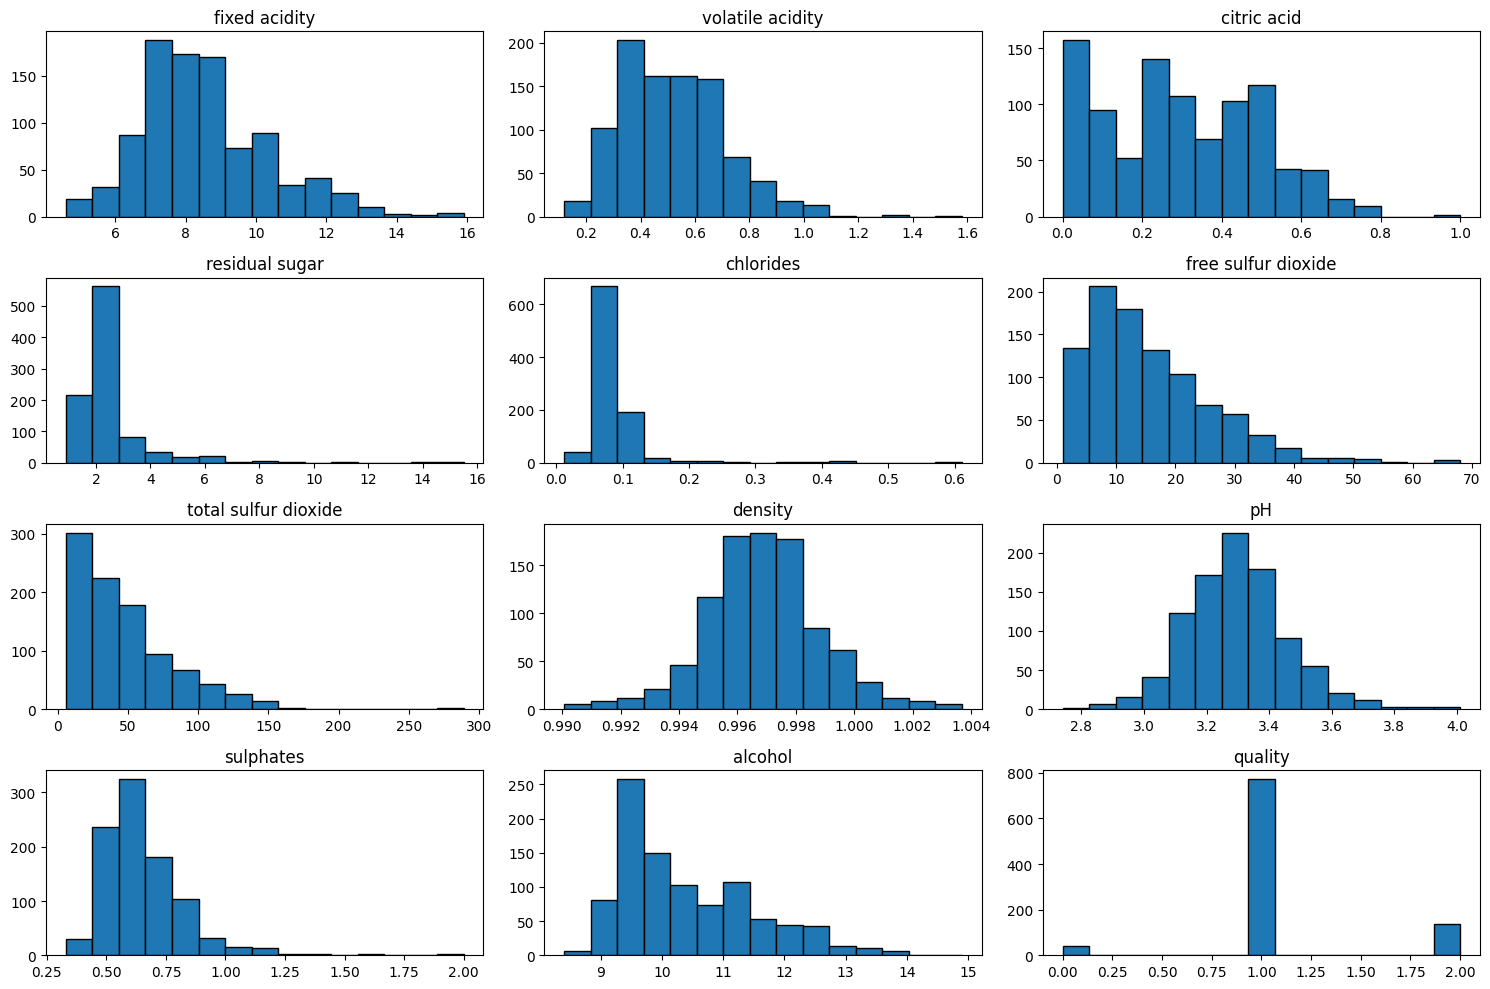

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Wine_Test_02_stud\Wine_Test_02_stud.csv")

# Plot histograms for all features including 'quality'
df.hist(bins=15, figsize=(15, 10), edgecolor='black', grid=False)
plt.tight_layout()
plt.show()

## Task 1.1 (b)

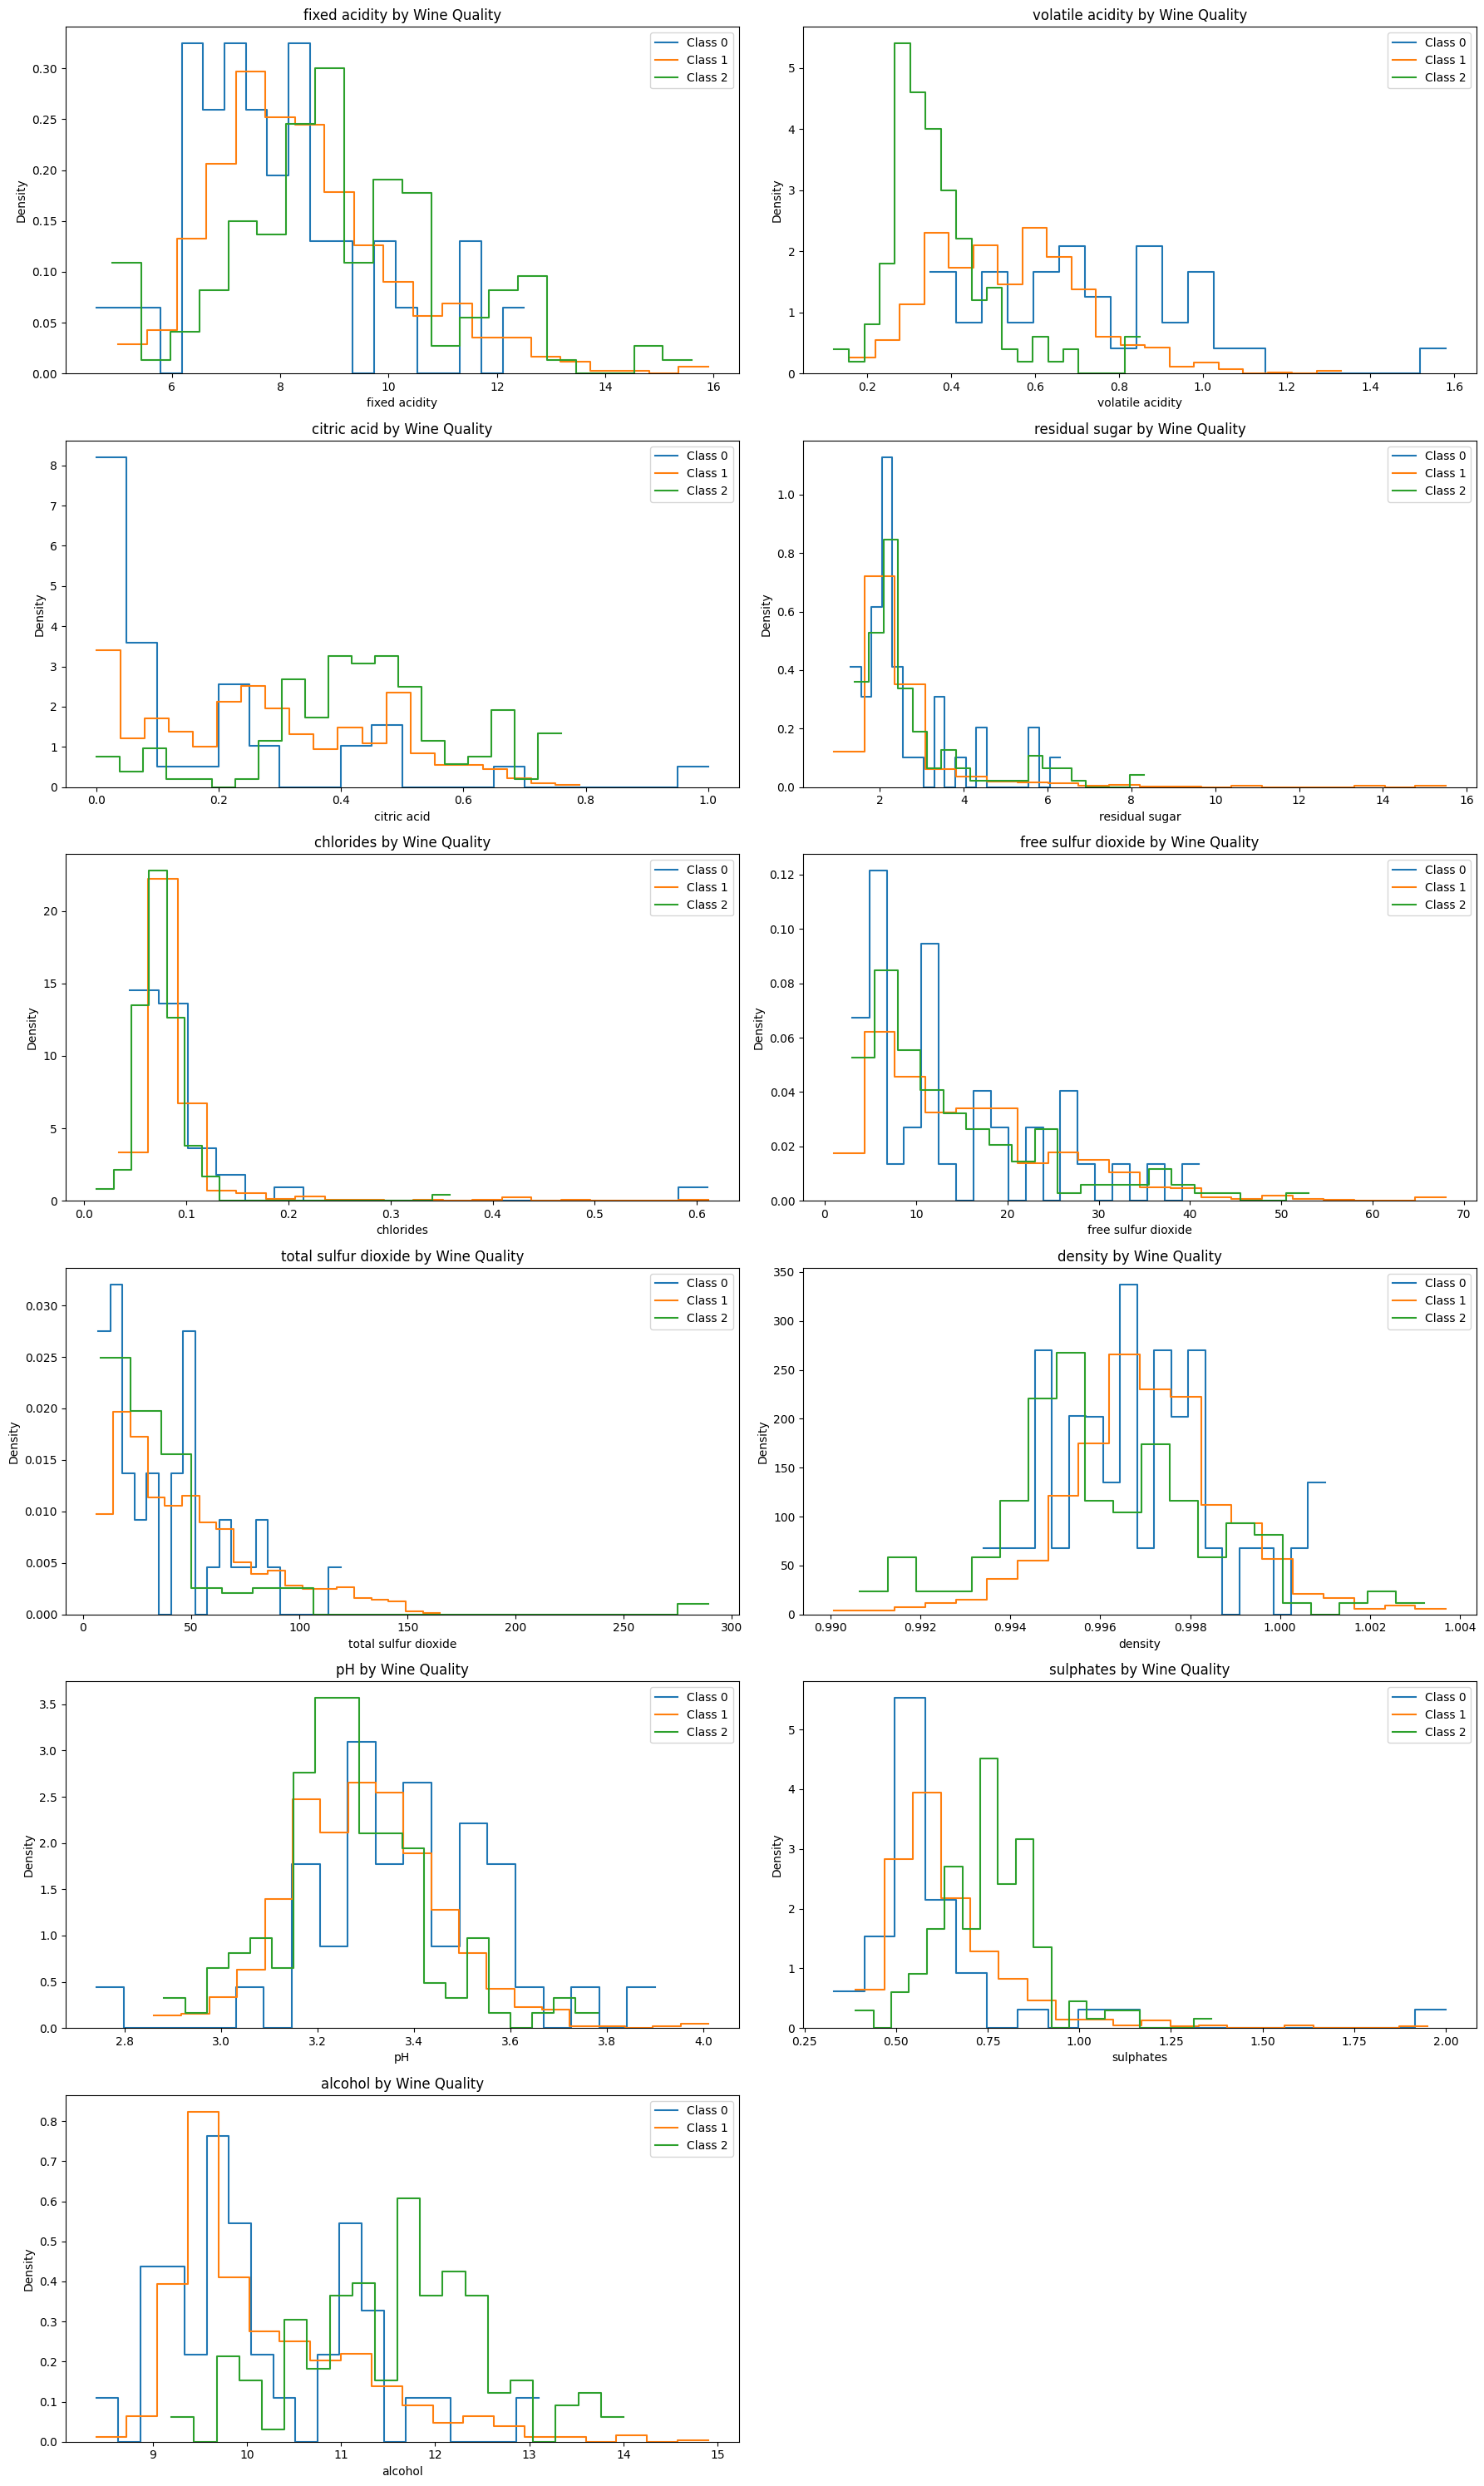

In [2]:

# List of feature columns (excluding target)
features = df.columns[:-1]
target = df.columns[-1]  # assuming 'quality' is the last column

# Plot (Gen AI generated)
plt.figure(figsize=(18, 30))
for idx, col in enumerate(features):
    plt.subplot(6, 2, idx + 1)
    for label in sorted(df[target].unique()):
        sns.histplot(df[df[target] == label][col], label=f'Class {label}', kde=False, stat='density', bins=20, element='step', fill=False)
    plt.title(f'{col} by Wine Quality')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
plt.tight_layout()
plt.show()

### Interpretation
- Features like **alcohol** and **volatile acidity** show some separation between classes.
- **Class 1 (medium)** overlaps heavily with class 0 (bad) and class 2 (good).
- Some features (e.g., **pH**, **residual sugar**) are not very discriminative.

### How Conclusion Was Reached
- Based on histogram plots grouped by `Y`, overlap between classes was visually assessed.
- Separation in certain features suggests potential for classification, but overlap limits precision.

### Conclusion
- The classifier may perform well distinguishing **bad (0)** and **good (2)** wines.
- **Medium (1)** class will likely cause misclassifications.
- Overall expected accuracy: **~60–70%**.


## Task 1.1 (c)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.preprocessing import StandardScaler

# Split features and target
X = df.drop(columns=["quality"])  # Replace with the actual name of target column if different
y = df["quality"]

# Scale features (Gen AI generated)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run 10 experiments
for i in range(1, 11):
    print(f"\n🔁 Run {i}")
    
    # Random train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=None)
    
    # Initialize model
    model = OneVsRestClassifier(GaussianProcessClassifier())
    
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Report
    print(classification_report(y_test, y_pred, digits=3, zero_division=0))


🔁 Run 1
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         8
           1      0.891     0.948     0.919       155
           2      0.667     0.593     0.627        27

    accuracy                          0.858       190
   macro avg      0.519     0.514     0.515       190
weighted avg      0.822     0.858     0.839       190


🔁 Run 2
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         8
           1      0.871     0.955     0.911       155
           2      0.684     0.481     0.565        27

    accuracy                          0.847       190
   macro avg      0.518     0.479     0.492       190
weighted avg      0.807     0.847     0.823       190


🔁 Run 3
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         8
           1      0.876     0.955     0.914       155
           2      0.667     0.519     0.583     

### Conclusion and Observations

1. **Class Imbalance**: 
   The model performs well for **Class 1 (Medium wines)** due to its higher frequency in the dataset, but struggles with **Class 0 (Bad wines)** and **Class 2 (Good wines)**. The **precision** for Class 0 is **undefined** because the model doesn't predict any instances of this class.

2. **Performance Variability**: 
   The model's **accuracy** fluctuates between **82% and 87%**, reflecting the challenge of correctly predicting all classes, especially the less frequent ones.


## Task 1.1 (d)

In [4]:
import numpy as np
from sklearn.metrics import accuracy_score

# List to store accuracy values of each run
accuracies = []

# Run 10 experiments
for i in range(1, 11):
    # Random train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=None)
    
    # Initialize model
    model = OneVsRestClassifier(GaussianProcessClassifier())
    
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Calculate accuracy for this run
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Calculate the average accuracy and standard deviation
average_accuracy = np.mean(accuracies)
std_deviation = np.std(accuracies)

# Display the results
print(f"Average Accuracy: {average_accuracy:.4f}")
print(f"Standard Deviation: {std_deviation:.4f}")


Average Accuracy: 0.8453
Standard Deviation: 0.0204


## Task 1.1 (e)

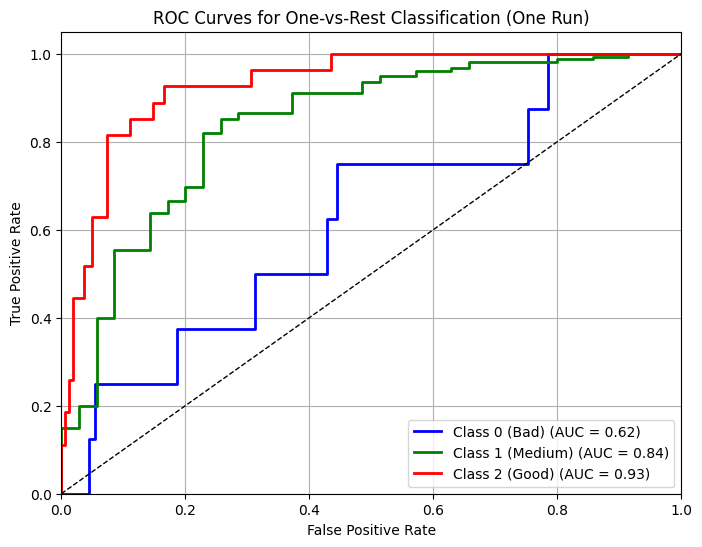

In [5]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output labels for ROC calculation (Gen AI generated)
y_bin = label_binarize(y, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_bin, test_size=0.2, stratify=y, random_state=42)

# Train model (OneVsRest)
model = OneVsRestClassifier(GaussianProcessClassifier())
model.fit(X_train, y_train)

# Predict probabilities
y_score = model.predict_proba(X_test)

# Plot ROC curves (Gen AI generated)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
labels = ['Class 0 (Bad)', 'Class 1 (Medium)', 'Class 2 (Good)']

# (Gen AI generated)
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'{labels[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for One-vs-Rest Classification (One Run)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## Task 1.2 (a)

In [6]:
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter

df = pd.read_csv("Wine_Test_02_stud\Wine_Test_02_stud.csv")

X = df.drop(columns=["quality"])
y = df["quality"]

# Scale features (Gen AI generated)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Show class distribution before SMOTE
print("🔎 Before SMOTE:", Counter(y_train))

# Apply SMOTE to training data (Gen AI generated)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Show class distribution after SMOTE
print("✅ After SMOTE:", Counter(y_train_smote))

🔎 Before SMOTE: Counter({1: 618, 2: 110, 0: 31})
✅ After SMOTE: Counter({1: 618, 2: 618, 0: 618})


## Task 1.2 (b)

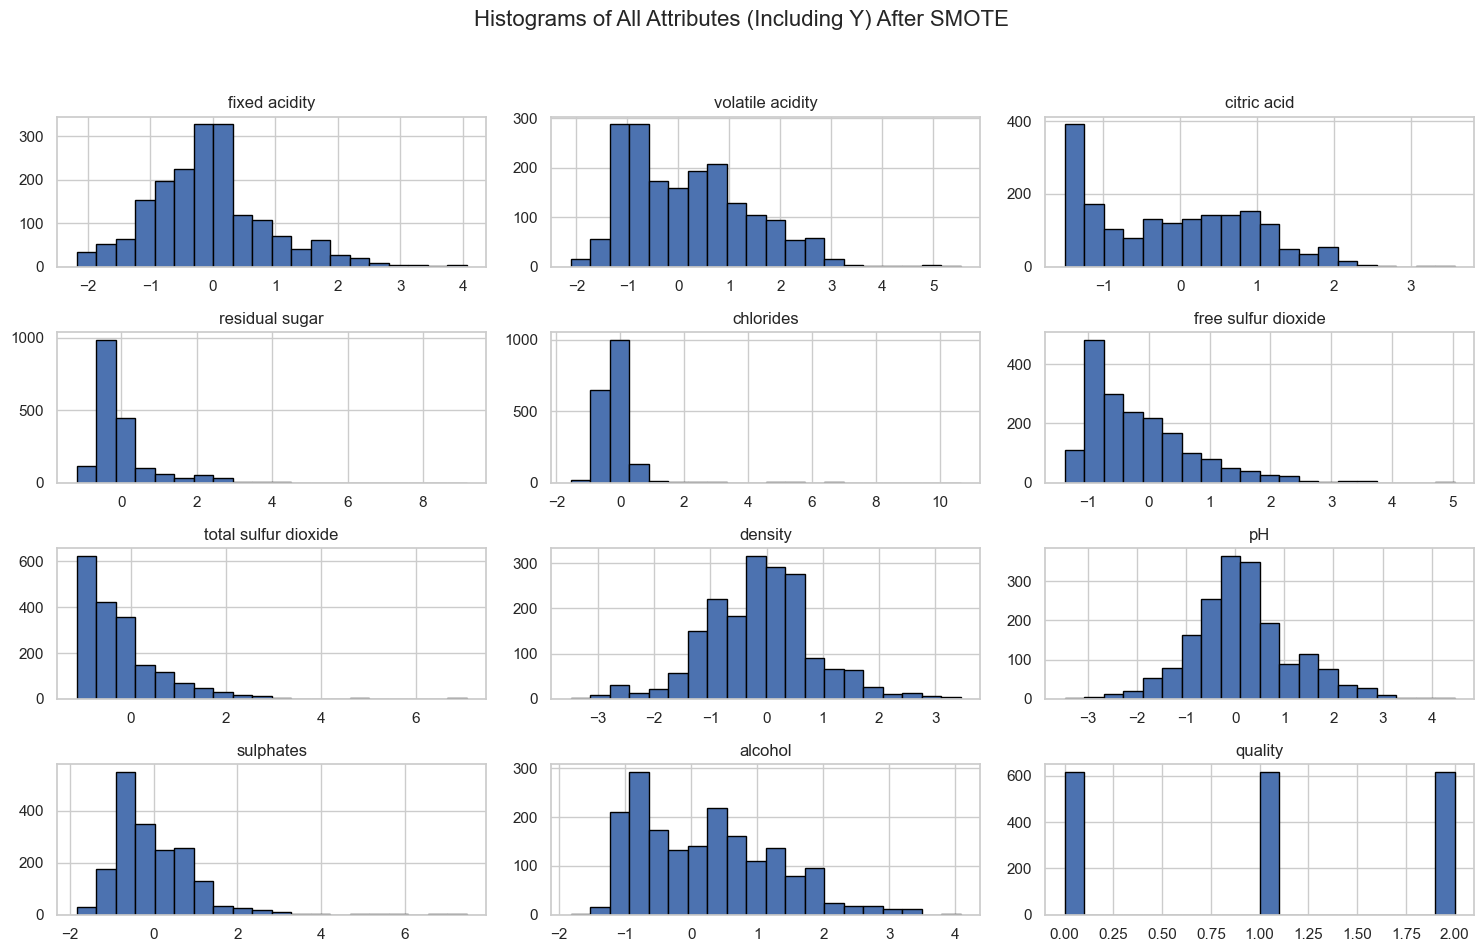

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine the SMOTE-balanced training features and target into a DataFrame for plotting
df_train_smote = pd.DataFrame(X_train_smote, columns=X.columns)
df_train_smote["quality"] = y_train_smote

# Set plot style (Gen AI generated)
sns.set(style="whitegrid")
df_train_smote.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle("Histograms of All Attributes (Including Y) After SMOTE", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Task 1.2 (c)

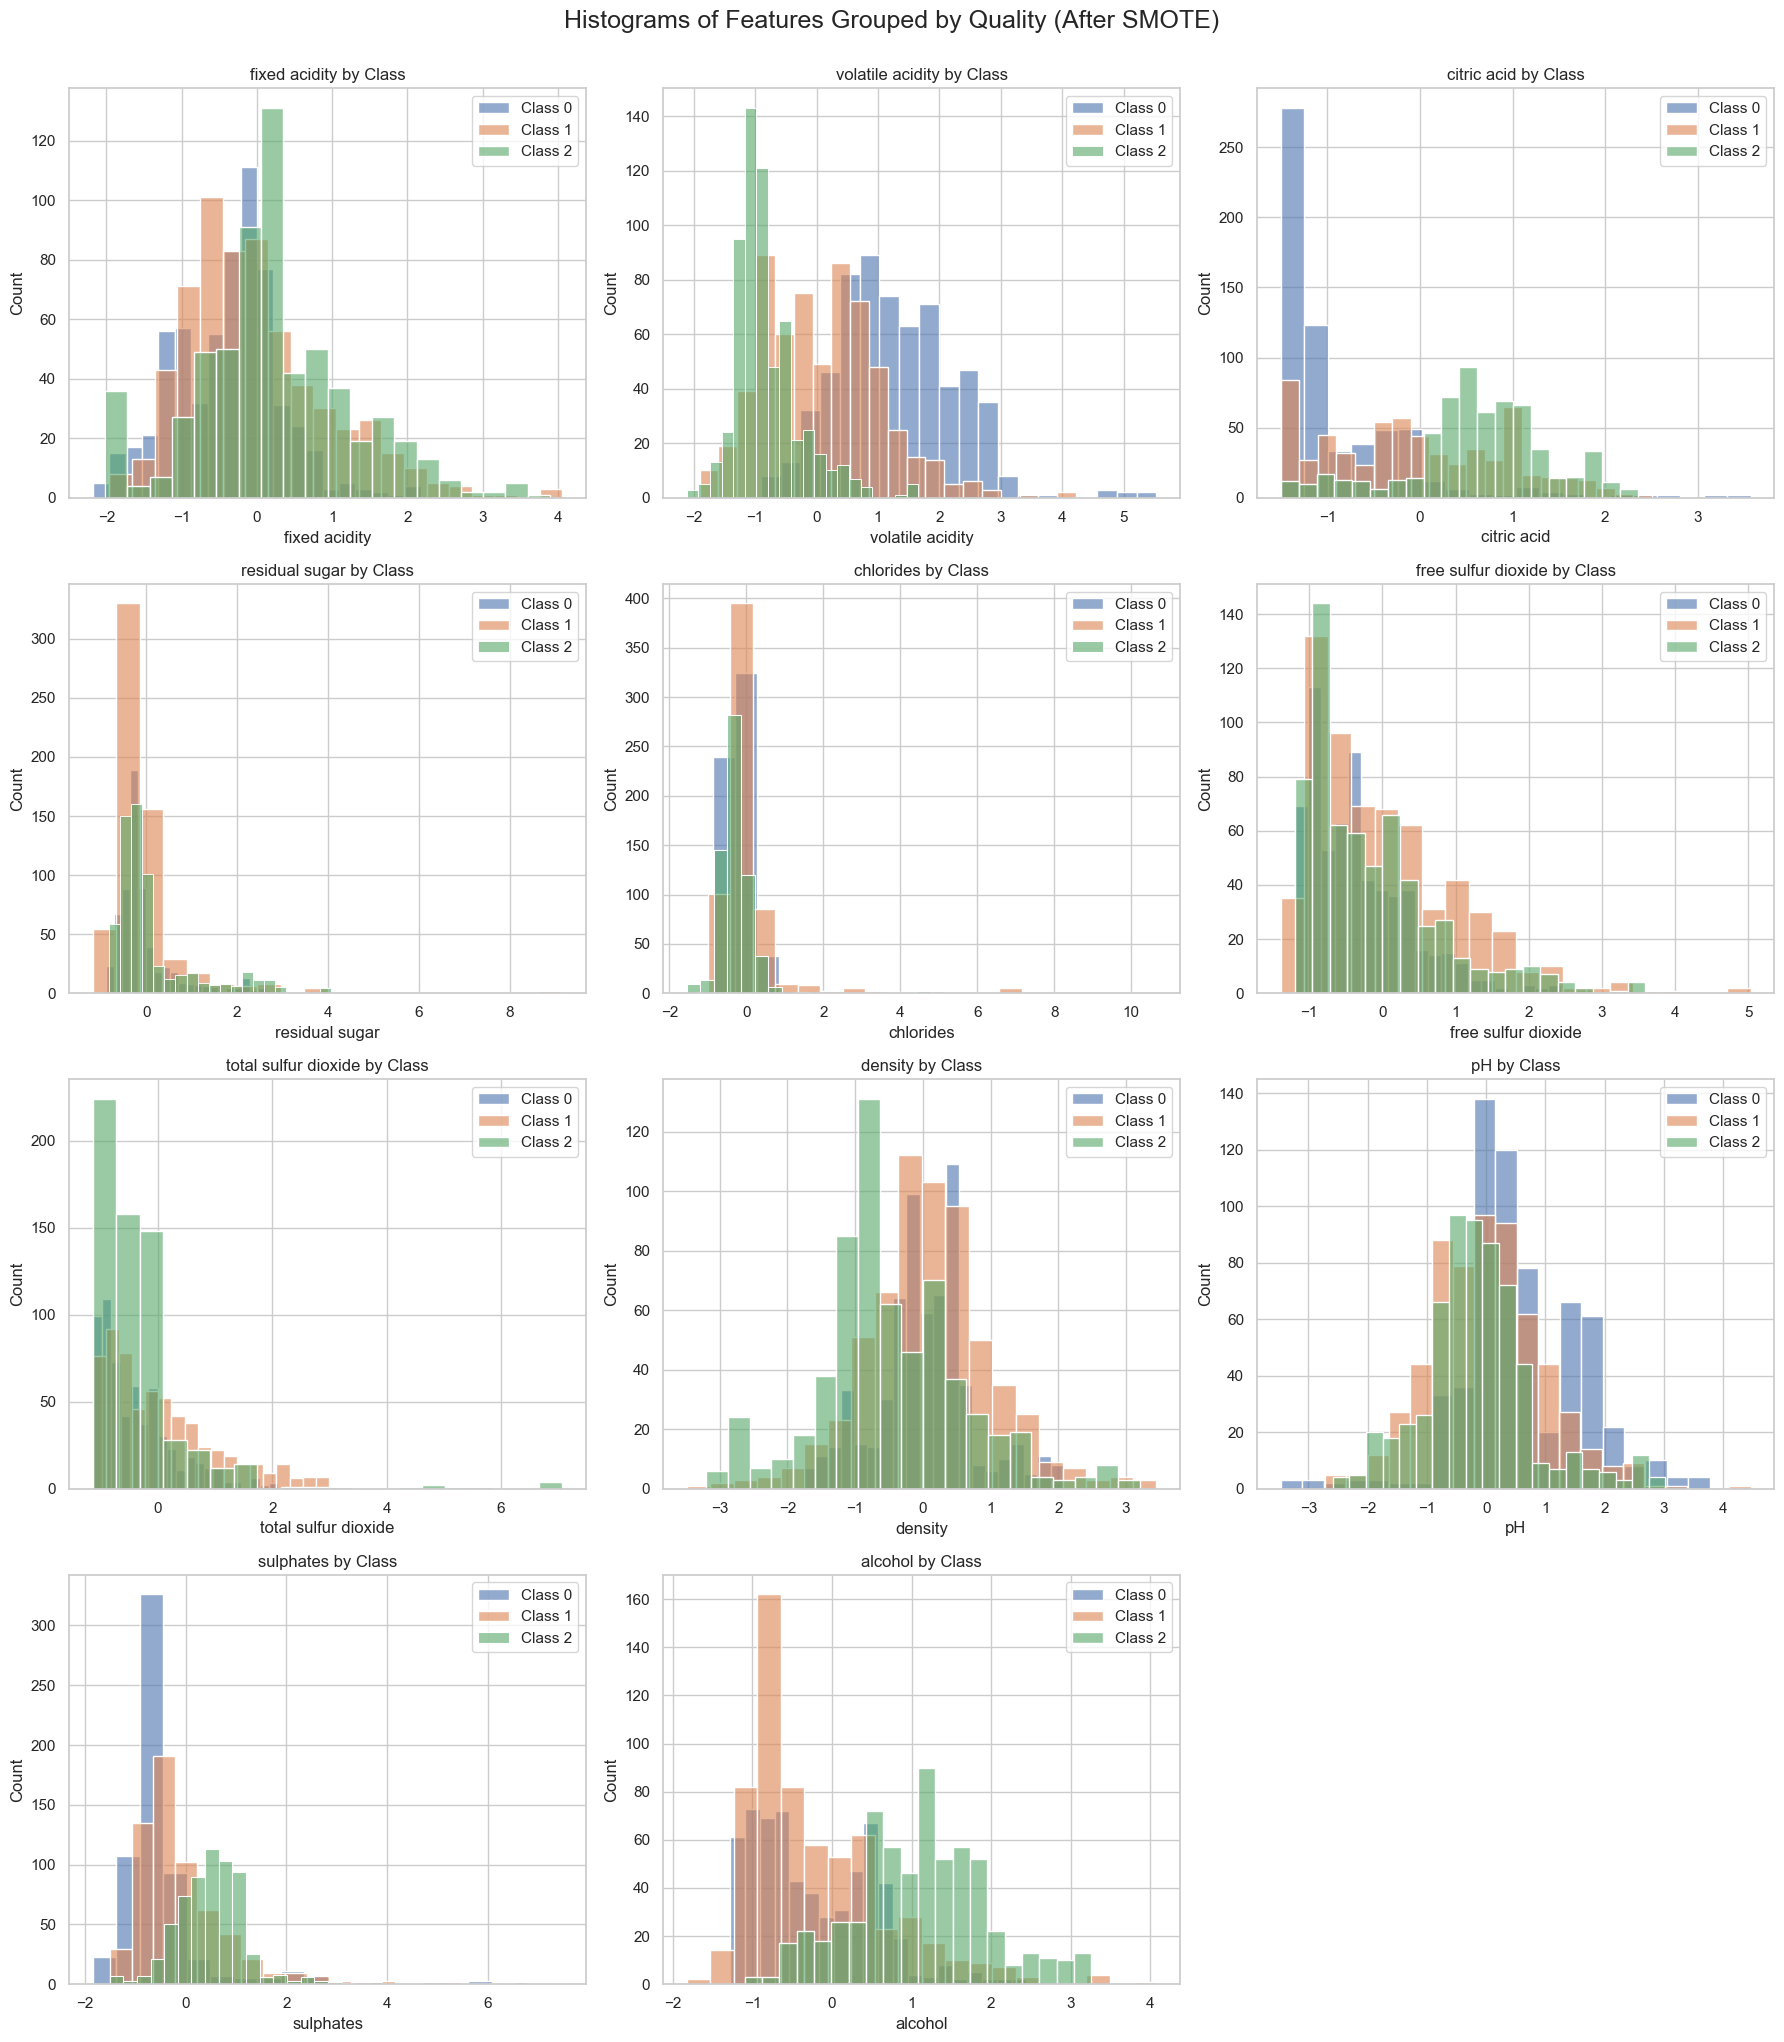

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Plot histograms grouped by quality
features = df_train_smote.columns[:-1]  # Exclude 'quality'
n_features = len(features)

# Layout configuration (Gen AI generated)
rows = (n_features + 2) // 3
plt.figure(figsize=(18, 5 * rows))

for idx, feature in enumerate(features):
    plt.subplot(rows, 3, idx + 1)
    for label in sorted(df_train_smote['quality'].unique()):
        subset = df_train_smote[df_train_smote['quality'] == label]
        sns.histplot(subset[feature], label=f"Class {label}", kde=False, bins=20, alpha=0.6)
    plt.title(f"{feature} by Class")
    plt.legend()

plt.tight_layout()
plt.suptitle("Histograms of Features Grouped by Quality (After SMOTE)", fontsize=18, y=1.02)
plt.show()


## Task 1.2 (d)


🔁 Run 1
              precision    recall  f1-score   support

           0      0.045     0.125     0.067         8
           1      0.917     0.710     0.800       155
           2      0.479     0.852     0.613        27

    accuracy                          0.705       190
   macro avg      0.480     0.562     0.493       190
weighted avg      0.818     0.705     0.743       190


🔁 Run 2
              precision    recall  f1-score   support

           0      0.143     0.250     0.182         8
           1      0.918     0.794     0.851       155
           2      0.524     0.815     0.638        27

    accuracy                          0.774       190
   macro avg      0.528     0.619     0.557       190
weighted avg      0.829     0.774     0.793       190


🔁 Run 3
              precision    recall  f1-score   support

           0      0.227     0.625     0.333         8
           1      0.921     0.755     0.830       155
           2      0.488     0.741     0.588     

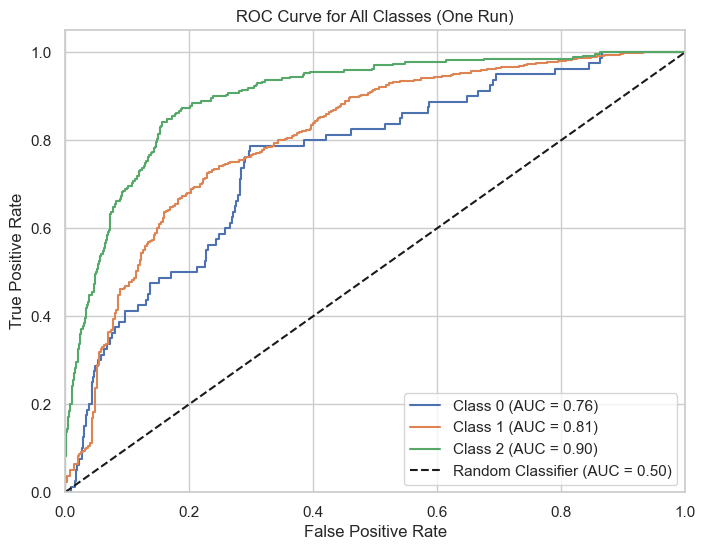

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.preprocessing import StandardScaler, label_binarize
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data
X = df.drop(columns=["quality"])  # Features
y = df["quality"]  # Target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Lists to store accuracies and predictions for the ROC curve
accuracies = []
y_test_all = []
y_pred_all = []

# Run 10 experiments
for i in range(1, 11):
    print(f"\n🔁 Run {i}")
    
    # Random train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=None)
    
    # Apply SMOTE only on the training data (Gen AI generated)
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    
    # Initialize model
    model = OneVsRestClassifier(GaussianProcessClassifier())
    
    # Train
    model.fit(X_train_smote, y_train_smote)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Classification report
    print(classification_report(y_test, y_pred, digits=3, zero_division=0))
    
    # Calculate accuracy for this run
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    # Store test labels and predictions for the ROC curve
    y_test_all.append(y_test)
    y_pred_all.append(model.predict_proba(X_test))

# Calculate average accuracy and standard deviation
avg_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)

print(f"\nAverage Accuracy: {avg_accuracy:.3f}")
print(f"Standard Deviation: {std_accuracy:.3f}")

# Concatenate test labels and predicted probabilities for all runs
y_test_all = np.concatenate(y_test_all)
y_pred_all = np.concatenate(y_pred_all)

# Binarize the labels for multi-class ROC (Gen AI generated)
y_test_bin = label_binarize(y_test_all, classes=[0, 1, 2])

# Calculate ROC curves and AUC for each class (Gen AI generated)
fpr = {}
tpr = {}
roc_auc = {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_all[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for all classes (Gen AI generated)
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Classes (One Run)')
plt.legend(loc="lower right")
plt.show()


## Task 1.2 (e)

### Results and Observations:

1. **Class Imbalance After SMOTE**:
   - Before applying SMOTE, the dataset had an imbalanced distribution of classes with class "1" (medium wines) being the majority class, while classes "0" (bad wines) and "2" (good wines) were significantly underrepresented.
   - After applying SMOTE, all three classes were balanced, each having the same number of samples (618 samples per class). This ensures that the classifier doesn't favor the majority class, leading to a more fair evaluation.

2. **Classification Report**:
   - The classification reports for the 10 runs show that the model performs well on the majority class (class "1"), achieving high precision, recall, and f1-score values for it.
   - However, the model struggles with the minority classes ("0" and "2"), particularly with the "bad wines" class (class "0"), which often shows precision and recall of 0. This suggests that the model is failing to predict these classes, likely because they are still underrepresented or more challenging to classify.
   - This indicates that although SMOTE helps balance the classes, the classifier's ability to predict all classes accurately is not uniform.

3. **Model Performance**:
   - The overall accuracy, while reasonably high (around 85-88%), may be misleading due to the model's difficulty in predicting the minority classes. High accuracy can be achieved if the model mostly predicts the majority class, but it doesn't necessarily reflect the model's ability to handle all class distributions.

4. **ROC Curves**:
   - The ROC curve plots provide additional insight into the model's performance. The areas under the curve (AUC) for each class can show how well the model distinguishes between classes. 
   - AUC values closer to 1.0 indicate better performance. A low AUC for class "0" (bad wines) suggests that the model is struggling to differentiate this class from others, which further confirms the issues observed in the classification report.


## Task 2.1 (a)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv("Wine_Test_02_stud\Wine_Test_02_stud.csv")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=["quality"]))
y = df["quality"]  # Assuming 'quality' is the target column
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

knn = []
error = []
y_pred = []
for i in range(1, 16):
    knn.append(KNeighborsClassifier(n_neighbors=i))
    knn[i-1].fit(X_train, y_train)
    y_pred.append(knn[i-1].predict(X_test))

    accuracy = accuracy_score(y_test, y_pred[i-1])
    error.append(1 - accuracy)





## Task 2.1 (b)

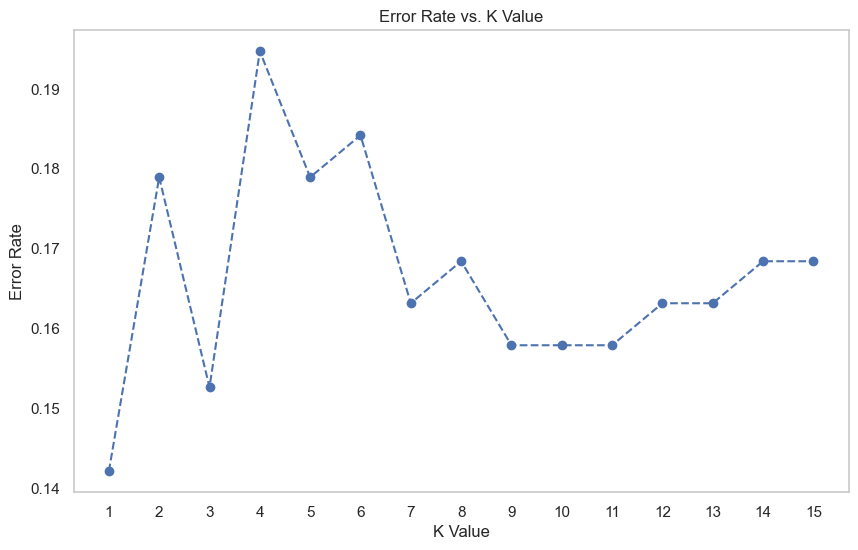

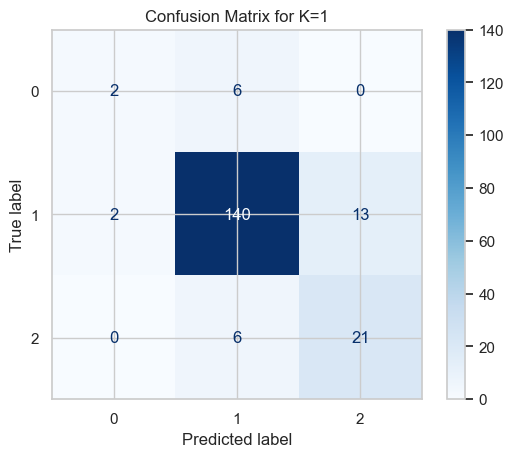

In [11]:
# Plotting the error rate vs. K value (Gen AI generated)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), error, marker='o', linestyle='--')
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.xticks(range(1, 16))
plt.grid()
plt.show()
min_error = min(error)
best_k = error.index(min_error) + 1


# Plotting the confusion matrix for the best K value (Gen AI generated)
matrix = confusion_matrix(y_test, y_pred[error.index(min_error)])
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=knn[best_k-1].classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title(f'Confusion Matrix for K={best_k}')
plt.show()


The dataset appears to be imbalanced, as there is a noticeable difference in the number of samples among the classes

## Task 2.1 (c)

In [12]:
import numpy as np
accuracy=[]
models = []
x_tests = []
y_tests = []
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=None)
    models.append(KNeighborsClassifier(n_neighbors=best_k))
    models[i].fit(X_train, y_train)
    y_pred = models[i].predict(X_test)
    x_tests.append(X_test)
    y_tests.append(y_test)
    print (classification_report(y_test, y_pred, digits=3, zero_division=0))
    accuracy.append(accuracy_score(y_test, y_pred))

    

              precision    recall  f1-score   support

           0      0.286     0.250     0.267         8
           1      0.891     0.897     0.894       155
           2      0.593     0.593     0.593        27

    accuracy                          0.826       190
   macro avg      0.590     0.580     0.584       190
weighted avg      0.823     0.826     0.825       190

              precision    recall  f1-score   support

           0      0.091     0.125     0.105         8
           1      0.897     0.845     0.870       155
           2      0.545     0.667     0.600        27

    accuracy                          0.789       190
   macro avg      0.511     0.546     0.525       190
weighted avg      0.813     0.789     0.800       190

              precision    recall  f1-score   support

           0      0.400     0.250     0.308         8
           1      0.871     0.871     0.871       155
           2      0.433     0.481     0.456        27

    accuracy        

## Task 2.1 (d)

In [13]:
average_accuracy = sum(accuracy) / len(accuracy)
std_deviation = np.std(accuracy)
print(f"Average Accuracy: {average_accuracy}")  
print(f"Standard Deviation: {std_deviation}")


Average Accuracy: 0.8073684210526316
Standard Deviation: 0.016509881201429606


## Task 2.1 (e)

              precision    recall  f1-score   support

           0      0.286     0.250     0.267         8
           1      0.891     0.897     0.894       155
           2      0.593     0.593     0.593        27

    accuracy                          0.826       190
   macro avg      0.590     0.580     0.584       190
weighted avg      0.823     0.826     0.825       190



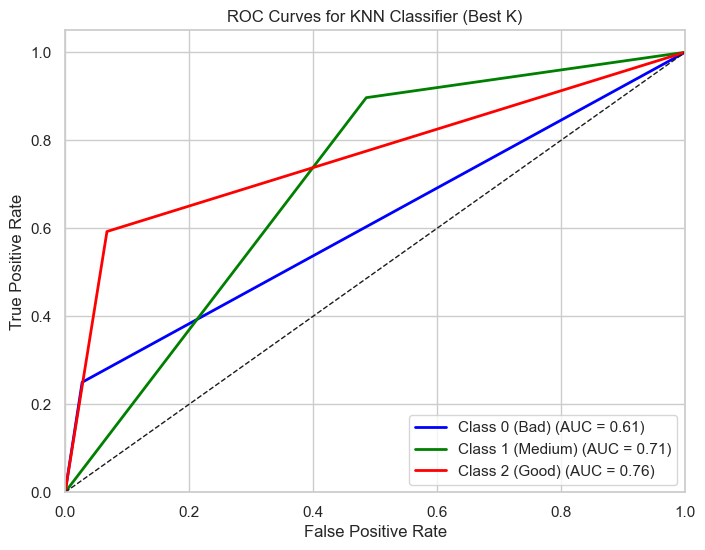

In [14]:
best_model = models[accuracy.index(max(accuracy))]
X_test = x_tests[accuracy.index(max(accuracy))]
y_test = y_tests[accuracy.index(max(accuracy))]
#plot roc curve
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize



# Binarize the output labels for ROC calculation
y_bin = label_binarize(y, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

# Split data

print (classification_report(y_test, best_model.predict(X_test), digits=3, zero_division=0))


y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Predict probabilities
y_score = best_model.predict_proba(X_test)
y_score = np.array(y_score)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


# Plotting the ROC curves (Gen AI generated)
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
labels = ['Class 0 (Bad)', 'Class 1 (Medium)', 'Class 2 (Good)']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'{labels[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for KNN Classifier (Best K)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()




## Task 2.2 (a)

In [15]:
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

import numpy as np

df = pd.read_csv("Wine_Test_02_stud\Wine_Test_02_stud.csv")

# Assuming df is your DataFrame and 'quality' is the target
X = df.drop(columns=["quality"])
y = df["quality"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=44)

# Show class distribution before SMOTE
print("🔎 Before SMOTE:", Counter(y_train))

# Apply SMOTE to training data
smote = SMOTE(random_state=44)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Show class distribution after SMOTE
print("✅ After SMOTE:", Counter(y_train_smote))

🔎 Before SMOTE: Counter({1: 618, 2: 110, 0: 31})
✅ After SMOTE: Counter({1: 618, 2: 618, 0: 618})


## Task 2.2 (b)

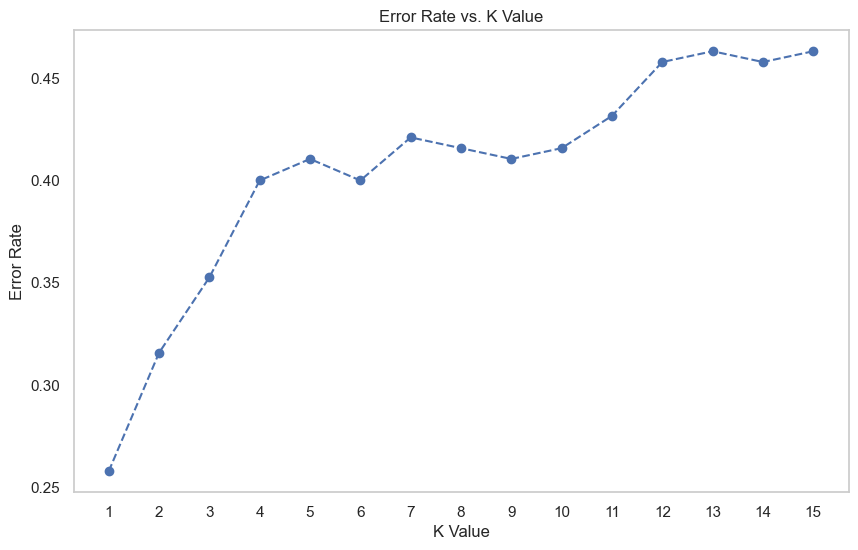

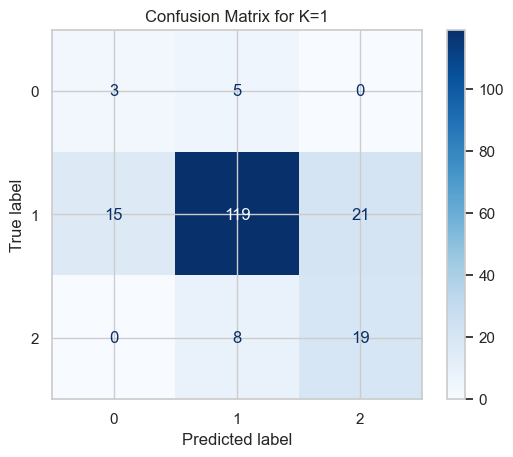

              precision    recall  f1-score   support

           0      0.000     0.000     0.000         8
           1      0.881     0.768     0.821       155
           2      0.429     0.667     0.522        27

    accuracy                          0.721       190
   macro avg      0.437     0.478     0.447       190
weighted avg      0.780     0.721     0.744       190

              precision    recall  f1-score   support

           0      0.200     0.500     0.286         8
           1      0.894     0.819     0.855       155
           2      0.571     0.593     0.582        27

    accuracy                          0.774       190
   macro avg      0.555     0.637     0.574       190
weighted avg      0.819     0.774     0.792       190

              precision    recall  f1-score   support

           0      0.125     0.250     0.167         8
           1      0.910     0.787     0.844       155
           2      0.525     0.778     0.627        27

    accuracy        

In [16]:
knn = []
error = []
y_pred = []
for i in range(1, 16):
    knn.append(KNeighborsClassifier(n_neighbors=i))
    knn[i-1].fit(X_train_smote, y_train_smote)
    y_pred.append(knn[i-1].predict(X_test))

    accuracy = accuracy_score(y_test, y_pred[i-1])
    error.append(1 - accuracy)



plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), error, marker='o', linestyle='--')
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.xticks(range(1, 16))
plt.grid()
plt.show()
min_error = min(error)
best_k = error.index(min_error) + 1


#Display confusion matrix for the best K value (Gen AI generated)
matrix = confusion_matrix(y_test, y_pred[error.index(min_error)])
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=knn[best_k-1].classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title(f'Confusion Matrix for K={best_k}')
plt.show()

X_tests = []
y_tests = []
accuracy=[]
models = []
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=None)
    models.append(KNeighborsClassifier(n_neighbors=best_k))
    smote = SMOTE(random_state=None)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    models[i].fit(X_train_smote, y_train_smote)
    y_pred = models[i].predict(X_test)
   
    accuracy.append(accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, digits=3, zero_division=0))
    X_tests.append(X_test)
    y_tests.append(y_test)


average_accuracy = sum(accuracy) / len(accuracy)
std_deviation = np.std(accuracy)
print(f"Average Accuracy: {average_accuracy}")  
print(f"Standard Deviation: {std_deviation}")


              precision    recall  f1-score   support

           0      0.200     0.500     0.286         8
           1      0.894     0.819     0.855       155
           2      0.571     0.593     0.582        27

    accuracy                          0.774       190
   macro avg      0.555     0.637     0.574       190
weighted avg      0.819     0.774     0.792       190



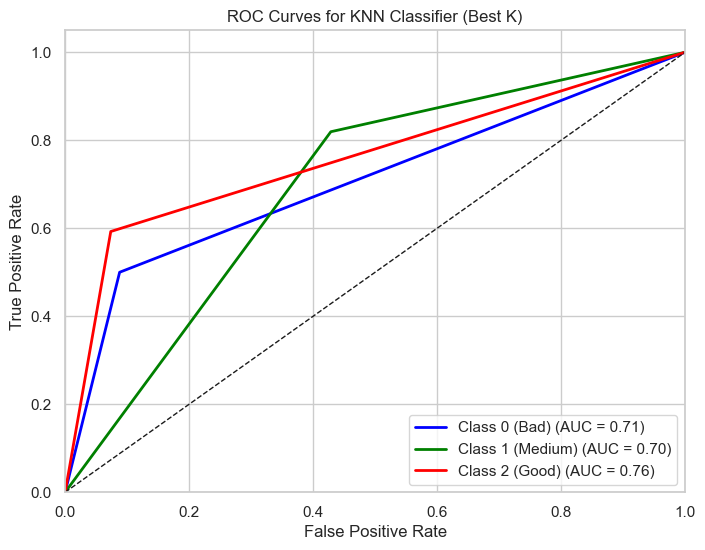

In [17]:
best_model = models[accuracy.index(max(accuracy))]
X_test = X_tests[accuracy.index(max(accuracy))]
y_test = y_tests[accuracy.index(max(accuracy))]


from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize



# Binarize the output labels for ROC calculation
y_bin = label_binarize(y, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

# Split data


print (classification_report(y_test, best_model.predict(X_test), digits=3, zero_division=0))

y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Predict probabilities
y_score = best_model.predict_proba(X_test)
y_score = np.array(y_score)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


# Plotting the ROC curves (Gen AI generated)
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
labels = ['Class 0 (Bad)', 'Class 1 (Medium)', 'Class 2 (Good)']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'{labels[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for KNN Classifier (Best K)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



## Task 2.2 (c)

### Results and Observations:

1. **Classification Report**:
   - The classification reports for the 5 runs show that the model performs well on the majority class (class "1"), achieving high precision, recall, and f1-score values for it, this values are similar using or not using SMOTE.
   - However, the model struggles with the minority classes ("0" and "2"), particularly with the "bad wines" class (class "0"). This suggests that the model is failing to predict these classes, likely because they are still underrepresented or more challenging to classify, but in the model using SMOTE, the results are even worse.
   - This indicates that SMOTE doesn't help to balance the classes, applying SMOTE with KNN is no giving good results, maybe because KNN models are highly sensitive to neighborhood structure, and SMOTE inserts synthetical points in wrong places.

3. **Model Performance**:
   - The overall accuracy, while reasonably high (around 76-78%), may be misleading due to the model's difficulty in predicting the minority classes. It is striking that the model with SMOTE performs worse than the one without it. That suggests that the synthetic sample may have introduce noise. 
4. **ROC Curves**:
   - The ROC curves shows only one sharp angle, because in this case the model perform better only with one neighbor.
   - Comparing the ROC curves we can see that using SMOTE, we have improve the False Positive Rate of class 0, but the AUC values has been decreased for all the classes.
   